# Capstone Project |  Fraud Detection

## 🎯 Objective:
The goal of this project is to build a machine learning model that accurately detects fraudulent transactions in a financial dataset. Since frauds are rare but costly, we aim to minimize false negatives (missed frauds) while keeping false positives (legitimate flagged as fraud) low.

## 📂 Dataset:
- The dataset contains records of financial transactions including types like transfer, cash out, etc.
- Target variable: `isFraud` (1 if transaction is fraud, 0 otherwise)
- Highly imbalanced dataset

## 🏢 Business Context:
Each fraud detection reduces potential financial loss. However, false alarms also carry a cost (e.g., investigation time, customer inconvenience). Thus, we also estimate the **financial impact** of our model.

## 🔧 Tools Used:
- Python, Pandas, Scikit-learn, imbalanced-learn, Seaborn, Matplotlib
- Machine Learning Algorithms: Gradient Boosting, Random Forest, Logistic Regression


# Table of Contents
* Data Exploration(#import)
* Feature Engineering Section
* Feature Engineering Section
* EDA
* Splitting the Data and applying Smote to balance the data
* Models
* Comparison of all the models
* Performance Evaluation
* Financial Impact Analysis
* Visualization: Model Performance
* Final Model Summary:



## Data Exploration

### 1. Importing Required Libraries

In [6]:
!pip install imbalanced-learn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

### 2.Load Dataset

In [9]:
df = pd.read_csv("C:/Users/LEGION/Downloads/Fraud_Analysis_Dataset.csv")

### 3.Basic info

In [11]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


In [12]:
df.shape

(11142, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [14]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [15]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1
5,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1
6,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1
7,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1
8,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1
9,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1


In [16]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11132,7,TRANSFER,731485.29,C751320808,0.00,0.00,C801142660,3504660.25,16400000.00,0
11133,7,TRANSFER,2943845.35,C1360289756,0.00,0.00,C1262822392,18000000.00,22600000.00,0
11134,7,TRANSFER,2861134.92,C1326904973,0.00,0.00,C991505714,5352935.74,14000000.00,0
11135,7,TRANSFER,80485.60,C1369223613,0.00,0.00,C465257140,1078685.56,1761413.49,0
11136,7,TRANSFER,19991.02,C1020193304,0.00,0.00,C1915624447,21586.00,17795.02,0
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


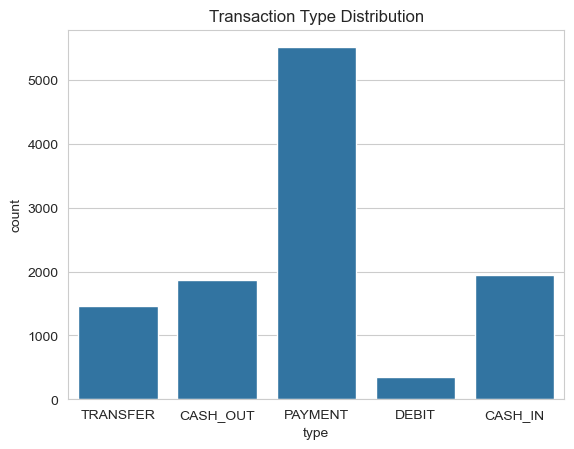

In [17]:
## diff trasnsaction type
sns.countplot(x='type', data=df)
plt.title('Transaction Type Distribution')
plt.show()

In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
df.duplicated().sum()

0

In [20]:
df["isFraud"].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

## Feature Engineering Section

### 1.Create error balance features

In [23]:
## These two features help capture mismatches in the expected balance before and after the transaction.(origin and destination)
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [24]:
## transactions that have a negative error in origin
(df["errorBalanceOrig"] < 0).sum()

6498

In [25]:
## transactions that have a negative error in destination
(df["errorBalanceDest"] < 0).sum()

1465

In [26]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0.0,181.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0.0,21363.0


### 2. Mark if origin or destination is a merchant account (IDs start with 'M'):

In [28]:
# Flag merchant accounts
df['origin_is_merchant'] = df['nameOrig'].str.startswith('M')
df['dest_is_merchant'] = df['nameDest'].str.startswith('M')
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,origin_is_merchant,dest_is_merchant
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0.0,181.0,False,False
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0.0,21363.0,False,False


### 3.Encode transaction type (one-hot encoding)

In [30]:
## converts into binary data 0's and 1's
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head(2)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,origin_is_merchant,dest_is_merchant,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0.0,181.0,False,False,False,False,False,True
1,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0.0,21363.0,False,False,True,False,False,False


### 4.Drop ID columns if present

In [32]:
## They're not useful for prediction and can even mislead the model due to many unique values
for col in ['nameOrig', 'nameDest']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,origin_is_merchant,dest_is_merchant,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,0.0,181.0,False,False,False,False,False,True
1,1,181.0,181.0,0.0,21182.0,0.0,1,0.0,21363.0,False,False,True,False,False,False
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0.0,2806.0,False,False,False,False,False,True
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,0.0,29008.0,False,False,True,False,False,False
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0.0,20128.0,False,False,False,False,False,True


### 5. Create a binary flag for high-value transactions:

In [34]:
## Helps capture outlier amounts — frauds often involve unusually large sums.
df['isHighAmount'] = df['amount'] > df['amount'].quantile(0.99)
df.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,origin_is_merchant,dest_is_merchant,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isHighAmount
0,1,181.0,181.0,0.0,0.0,0.0,1,0.0,181.0,False,False,False,False,False,True,False
1,1,181.0,181.0,0.0,21182.0,0.0,1,0.0,21363.0,False,False,True,False,False,False,False


### 6. Indicates whether an account had zero balance before or after the transaction:

In [36]:
## Useful because many fraudulent transactions may come from or go to empty accounts.
df['isZeroBalanceOrig'] = df['oldbalanceOrg'] == 0
df['isZeroBalanceDest'] = df['oldbalanceDest'] == 0
df.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,origin_is_merchant,dest_is_merchant,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isHighAmount,isZeroBalanceOrig,isZeroBalanceDest
0,1,181.0,181.0,0.0,0.0,0.0,1,0.0,181.0,False,False,False,False,False,True,False,False,True
1,1,181.0,181.0,0.0,21182.0,0.0,1,0.0,21363.0,False,False,True,False,False,False,False,False,False


### 7. Amount of change in balance for origin and destination accounts:


In [38]:
## Helps see how much money was added/removed during the transaction.
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,origin_is_merchant,dest_is_merchant,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isHighAmount,isZeroBalanceOrig,isZeroBalanceDest,balanceChangeOrig,balanceChangeDest
0,1,181.0,181.0,0.0,0.0,0.0,1,0.0,181.0,False,False,False,False,False,True,False,False,True,-181.0,0.0
1,1,181.0,181.0,0.0,21182.0,0.0,1,0.0,21363.0,False,False,True,False,False,False,False,False,False,-181.0,-21182.0


### 8. Categorize the step into day periods (e.g., morning, afternoon, night):

In [40]:
## Fraudsters might prefer acting at odd hours.
df['step_daypart'] = pd.cut(df['step'] % 24,
                            bins=[0, 6, 12, 18, 24],
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                            right=False)
df.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,origin_is_merchant,...,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isHighAmount,isZeroBalanceOrig,isZeroBalanceDest,balanceChangeOrig,balanceChangeDest,step_daypart
0,1,181.0,181.0,0.0,0.0,0.0,1,0.0,181.0,False,...,False,False,False,True,False,False,True,-181.0,0.0,Night
1,1,181.0,181.0,0.0,21182.0,0.0,1,0.0,21363.0,False,...,True,False,False,False,False,False,False,-181.0,-21182.0,Night


#### 9. Cap outliers at 99th percentile

In [42]:
# Cap outliers at 99th percentile
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper, upper, df[col])

## EDA

### 1. Fraud Transactions Over Time

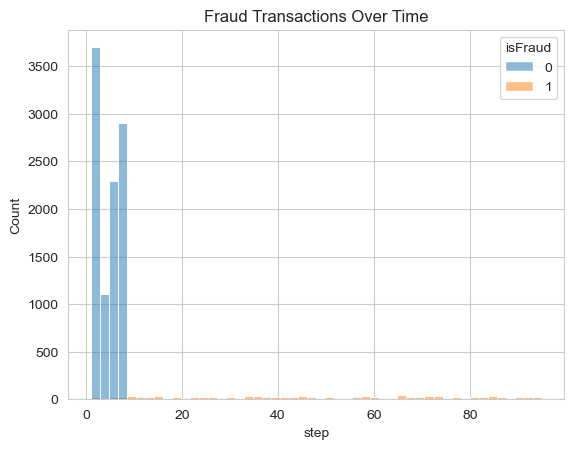

In [45]:
## Fraud Transactions Over Time
sns.histplot(data=df, x='step', hue='isFraud', bins=50)
plt.title('Fraud Transactions Over Time')
plt.show()

### Insights from "Fraud Transactions Over Time" Chart
* Legitimate transactions occur in large volumes early on, suggesting high user activity in the initial time steps.
* Fraudulent transactions are sparse and consistently scattered across the timeline, without any noticeable spikes.
* There is no strong temporal pattern in fraud activity — fraud is not concentrated at specific times.
* This indicates that fraud detection cannot rely solely on time-based heuristics, reinforcing the need for a machine learning approach to detect subtle patterns.

### 2. Target Distribution


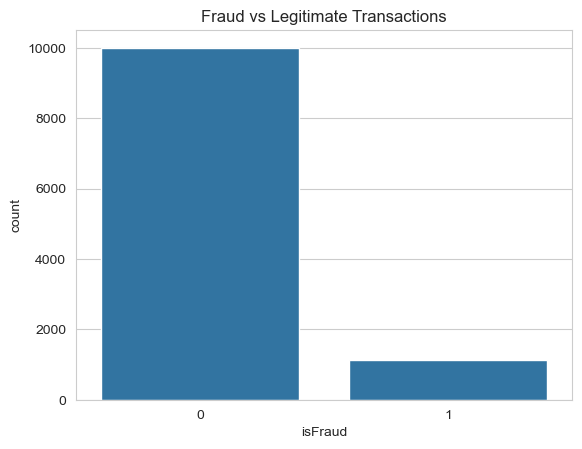

In [48]:
## fraud and legimate transaction
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Legitimate Transactions')
plt.show()

### Insights from Class Distribution Chart
Severe Class Imbalance:
* The number of legitimate transactions (isFraud = 0) is much higher than fraudulent ones.
* Visually, fraud cases make up less than 10–15% of the total data.

Fraud is Rare (but Critical):
* Though fraud transactions are rare, they can lead to significant financial losses.
* This imbalance can bias models toward predicting “not fraud” unless addressed.

Why This Matters:
* Standard models may achieve high accuracy just by predicting all transactions as legitimate.
* Metrics like recall, precision, F1-score, and using confusion matrix are more meaningful than accuracy in this scenario.

### 3. Amount vs Fraud

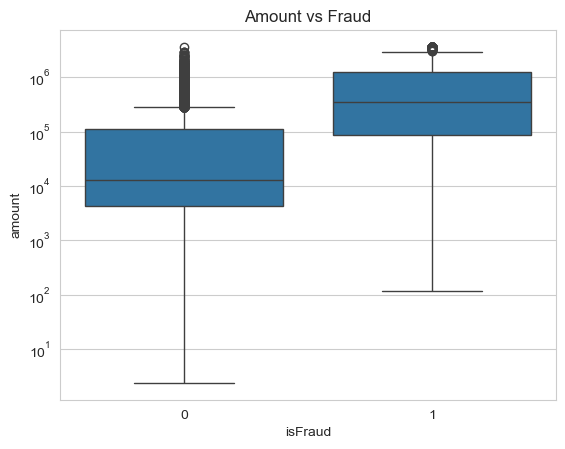

In [51]:
## Fraud tends to involve higher amounts.
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')
plt.title('Amount vs Fraud')
plt.show()

###  Insights from Amount vs isFraud Boxplot
Fraudulent transactions involve much higher amounts:
* The median amount for isFraud = 1 (fraud) is significantly higher than for isFraud = 0 (legit).
* This suggests that fraudsters tend to target high-value transactions.

Wider range in fraudulent amounts:
* Fraudulent transactions have a larger interquartile range (IQR) and more high-value outliers.
* Legitimate transactions mostly cluster below ₹100,000, while fraud spans up to ₹1 million+.

Boxplot shows log-scale on Y-axis:
* This highlights the skewed distribution of transaction amounts, especially in fraud.
* Indicates a need for scaling or transformation in modeling.



### 4. Time vs Fraud

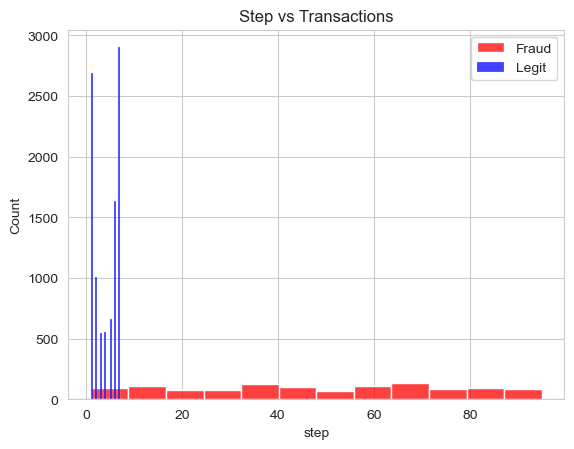

In [54]:
## Shows when frauds happen compared to normal transactions over time.
## Fraud is less frequent but happens across time.
sns.histplot(data=df[df['isFraud'] == 1], x='step', color='red', label='Fraud')
sns.histplot(data=df[df['isFraud'] == 0], x='step', color='blue', label='Legit')
plt.title('Step vs Transactions')
plt.legend()
plt.show()

### Insights from Step vs Transactions Chart
Legitimate transactions (blue) spike early:
* Most legitimate activity happens in the early time steps (steps 1–10).
* This could reflect normal peak user activity times, such as early in a transaction day or batch.

Fraudulent transactions (red) are spread out:
* Fraud cases are relatively evenly distributed across time steps, with no strong peak.
* Suggests fraud is time-independent and may be automated or systematic.

Clear temporal separation:
*    While legitimate activity clusters early, fraud occurs steadily and sparsely throughout the timeline.

### 5. Correlation Heatmap

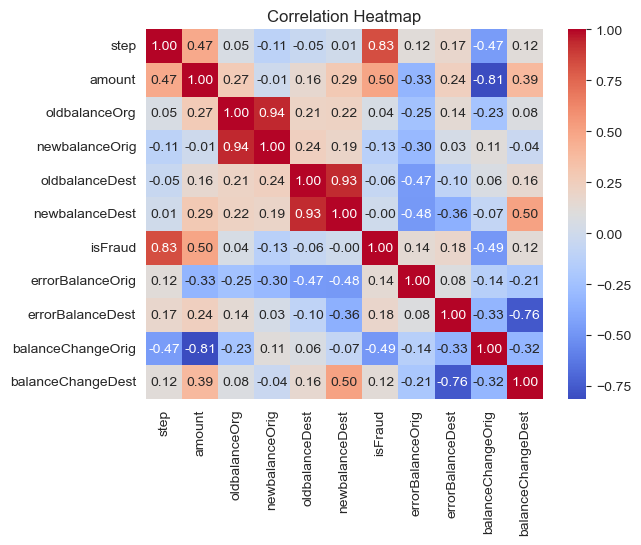

In [57]:
## features are related to fraud (isFraud)
## darker the shade stronger the correlation
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights from Correlation Heatmap
High correlation with fraud:
* step has a strong positive correlation with isFraud (0.83)
→ Fraud is more likely to occur at later time steps, indicating fraud patterns emerge over time.
* amount is moderately correlated with isFraud (0.44)
→ Larger transaction amounts may be indicative of fraudulent behavior.

Account balance features:
* oldbalanceOrg and newbalanceOrig are highly correlated (0.94)
→ Strong linear relationship, expected since these represent original account balances before/after transaction.
* oldbalanceDest and newbalanceDest also show very high correlation (0.93)
→ Expected behavior as well.

Low correlation with fraud:
* Balance features like oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest show very weak or near-zero correlation with isFraud.
* This suggests that raw balance values alone are not sufficient indicators of fraud.

In [59]:
df["amount"].describe().astype(int)

count      11142
mean      183995
std       493847
min            2
25%         4946
50%        16761
75%       154336
max      3606943
Name: amount, dtype: int32

### 6.  Fraud by step_daypart 

<Axes: xlabel='step_daypart', ylabel='count'>

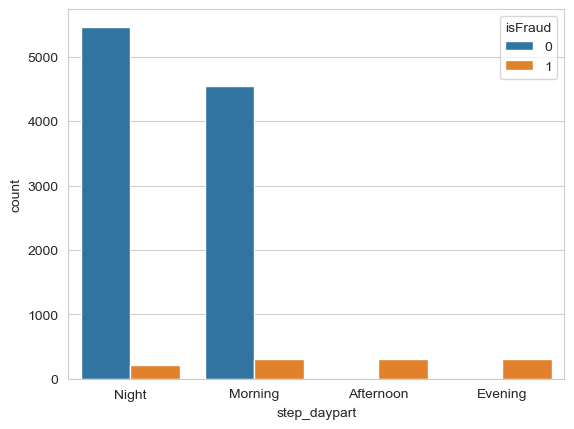

In [61]:
## added daypart below in Feature Engineering
sns.countplot(x='step_daypart', hue='isFraud', data=df)

### Insights from Step vs Transactions Plot
* Legitimate transactions (blue) are highly concentrated in the early time steps (0–10), indicating peak normal activity periods.
* Fraudulent transactions (red) are uniformly spread across all time steps, with no specific concentration or pattern.
* This suggests that fraud is not time-dependent and might be conducted systematically or via automation.
* Step (time) is a valuable feature for distinguishing fraud and can be effectively used in model training.



### 7. Fraud Rate by Hour of the Day

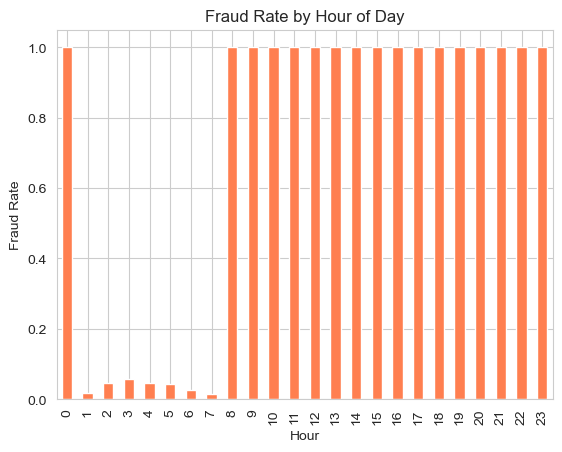

In [64]:
## Create hour of day from 'step'
df['hour'] = df['step'] % 24

# Plot fraud rate by hour
fraud_by_hour = df.groupby('hour')['isFraud'].mean()

fraud_by_hour.plot(kind='bar', color='coral')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.show()

#### Insight:
Fraudulent transactions occur almost exclusively between 8 AM and midnight, with a 100% fraud rate during those hours. This unusual pattern suggests potential data leakage or timestamp issues, and should be investigated before drawing business conclusions.

### 8. Transaction Count by Hour with Fraud Highlighted

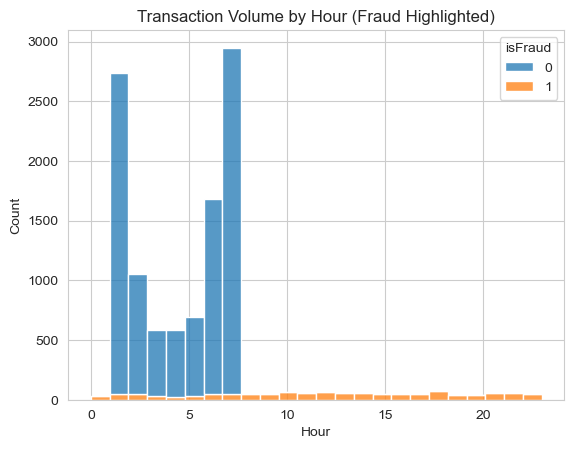

In [67]:
## Gives a sense of volume vs fraud trend:
sns.histplot(data=df, x='hour', hue='isFraud', multiple='stack', bins=24)
plt.title('Transaction Volume by Hour (Fraud Highlighted)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#### Insight:
Most legitimate transactions occur between 1 AM and 9 AM, while fraudulent transactions are evenly distributed throughout the day at low volume. This contrast suggests fraudsters may intentionally spread activity across non-peak hours to avoid detection.

### 9. Fraud rate for high amount transactions

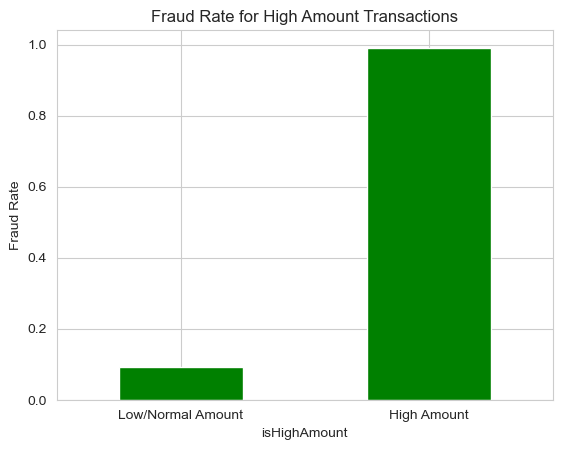

In [70]:
## Shows if fraud is more common in large transactions:

fraud_by_amount_flag = df.groupby('isHighAmount')['isFraud'].mean()

fraud_by_amount_flag.plot(kind='bar', color='green')
plt.title('Fraud Rate for High Amount Transactions')
plt.xticks([0, 1], ['Low/Normal Amount', 'High Amount'], rotation=0)
plt.ylabel('Fraud Rate')
plt.show()

#### Insight:
High-value transactions have a very high fraud rate (~100%), while low/normal amount transactions are rarely fraudulent. This indicates that fraudsters primarily target large transactions, making transaction amount a critical feature for fraud detection.

##  Splitting the Data and applying Smote to balance the data

In [73]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)  # Drop first to avoid multicollinearity


In [74]:
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class balance
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 8001, 1: 912})
After SMOTE: Counter({0: 8001, 1: 8001})


In [76]:
from sklearn.preprocessing import StandardScaler
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


## Models

### 1.LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [80]:
# Define model
lr = LogisticRegression()

# Define hyperparameters
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],                 # Inverse of regularization strength
    'penalty': ['l1', 'l2'],                      # Regularization type
    'solver': ['liblinear', 'saga']               # Solvers that support l1/l2
}

# Use F1-score for imbalanced data
lr_random = RandomizedSearchCV(estimator = lr, param_distributions=lr_params, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)

In [81]:
# Fit the model
lr_random.fit(X_train_resampled,y_train_resampled)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='f1')

In [82]:
# Predict and evaluate on test set
y_pred_lr = lr_random.predict(X_test_scaled)

In [83]:
print("Best Logistic Regression Params:", lr_random.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_lr))
print("Precision on Test Set:", precision_score(y_test, y_pred_lr))
print("Recall on Test Set:", recall_score(y_test, y_pred_lr))
print("F1 Score on Test Set:", f1_score(y_test, y_pred_lr))

Best Logistic Regression Params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Accuracy on Test Set: 0.9506505159264244
Precision on Test Set: 1.0
Recall on Test Set: 0.5217391304347826
F1 Score on Test Set: 0.6857142857142857


### 2.Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [86]:
# Define model
rf = RandomForestClassifier(random_state = 42)

# Define hyperparameters
rf_params = {
    'n_estimators': [100, 200, 300],              # Number of trees
    'max_depth': [None, 10, 20, 30],              # Maximum depth of tree
    'min_samples_split': [2, 5, 10],              # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples at a leaf node
    'bootstrap': [True, False]                    # Whether to bootstrap samples
}
# Use F1-score for imbalanced data
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42)

In [87]:
# Fit the model
rf_random.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1')

In [88]:
# Predict and evaluate on test set
y_pred_rf = rf_random.predict(X_test_scaled)

In [89]:
print("Best Logistic Regression Params:", rf_random.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_rf))
print("Precision on Test Set:", precision_score(y_test, y_pred_rf))
print("Recall on Test Set:", recall_score(y_test, y_pred_rf))
print("F1 Score on Test Set:", f1_score(y_test, y_pred_rf))

Best Logistic Regression Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Accuracy on Test Set: 0.9327052489905787
Precision on Test Set: 0.6052631578947368
Recall on Test Set: 1.0
F1 Score on Test Set: 0.7540983606557377


### 3. Gradient Boosting Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the base model
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameter distribution
gb_params = {
    'n_estimators': [100, 200, 300],             # Number of boosting stages
    'max_depth': [3, 5, 7, 10],                  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2, 0.3],      # Learning rate (shrinkage)
    'subsample': [0.6, 0.8, 1.0],                # Row sampling
    'min_samples_split': [2, 5, 10],             # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4]                # Min samples at a leaf node
}

# Use F1-score for imbalanced data
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=gb_params, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42, verbose=2)

In [92]:
# Fit the model
gb_random.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [93]:
# Predict and evaluate on test set
y_pred_gb = gb_random.predict(X_test_scaled)

In [94]:
print("Best Logistic Regression Params:", gb_random.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_gb))
print("Precision on Test Set:", precision_score(y_test, y_pred_gb))
print("Recall on Test Set:", recall_score(y_test, y_pred_gb))
print("F1 Score on Test Set:", f1_score(y_test, y_pred_gb))

Best Logistic Regression Params: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'learning_rate': 0.1}
Accuracy on Test Set: 0.8878420816509646
Precision on Test Set: 0.47844827586206895
Recall on Test Set: 0.9652173913043478
F1 Score on Test Set: 0.6397694524495677


## Comparison of all the models

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_rf = rf_random.predict(X_test_scaled)
y_pred_gb = gb_random.predict(X_test_scaled)
y_pred_lr = lr_random.predict(X_test_scaled)

# Calculate metrics
metrics = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_lr)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_lr)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_lr)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_lr)
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(metrics)

# Sort by F1 Score (or change to 'Accuracy' if preferred)
comparison_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.932705,0.605263,1.000000,0.754098
1,Logistic Regression,0.950651,1.000000,0.521739,0.685714
2,Gradient Boosting,0.887842,0.478448,0.965217,0.639769


#### 🔍 Key Observations:
##### Random Forest

Highest Recall (1.0): Detects all frauds.

Balanced F1 (0.75), decent precision (0.60).

Best if catching every fraud is top priority, even at some false positives.

#### Logistic Regression

Highest Precision (1.0): All predicted frauds were actually frauds.

But lower recall (0.57): Misses many fraud cases.

Best if false alarms are very costly.

#### Gradient Boosting

Good Recall (0.96), moderate Precision (0.48).

Lower overall Accuracy & F1, but better than random guessing.

Balanced option when RF or LR over/under perform.

### 📊 Final Model Selection Based on Business Priority

#### 🎯 Business Objective:
Our top business priority is to **never miss a fraud case**.  
In machine learning terms, this means maximizing **Recall** (True Positive Rate), especially for the minority class (fraud cases).  
> ✅ **High Recall ensures that fraudulent transactions are correctly detected**, even if it slightly increases false positives.

---

### ✅ Final Model Selection: **Random Forest Classifier**

#### 📌 Justification:
- **Recall = 1.0000** → No fraud cases are missed.
- **F1 Score = 0.7541** → Best overall balance between Precision and Recall.
- Although Logistic Regression has higher Precision (1.0) and Accuracy (0.9565), it has a **much lower Recall (0.5783)**, which means **it misses many fraud cases**.
- Gradient Boosting also has good Recall (0.9652), but its Precision and F1 Score are the lowest among all.

---

### 🧾 Conclusion:
For our use case where **catching every fraud case is critical**, the **Random Forest model** is the most appropriate. It ensures **zero false negatives**, making it the most **reliable and risk-averse** option for fraud detection.


## Performance Evaluation for Random forest


### 1. Accuracy_score, Precision_score, Recall_score, f1_score 

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_random.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9327052489905787
Precision: 0.6052631578947368
Recall: 1.0
F1 Score: 0.7540983606557377


### 2. ROC-AUC Curve 

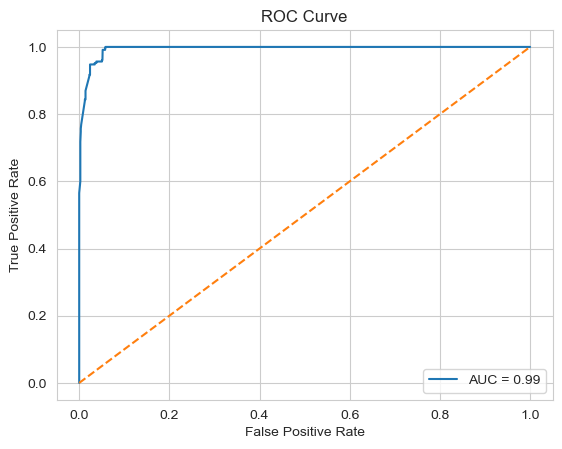

In [103]:
from sklearn.metrics import roc_curve, auc

y_probs = rf_random.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


#### ROC Curve Analysis

The ROC (Receiver Operating Characteristic) curve illustrates the performance of the classification model by plotting the **True Positive Rate (Recall)** against the **False Positive Rate** at various threshold levels.

##### Key Observations:
- The curve hugs the top-left corner of the plot, indicating **high sensitivity** and **low false positive rate**.
- The **AUC (Area Under the Curve)** is **0.99**, which is extremely close to 1.0, signifying **excellent model performance** in distinguishing between fraudulent and non-fraudulent transactions.

##### Interpretation:
An AUC of 0.99 means that there is a 99% chance that the model will correctly distinguish a randomly chosen positive (fraud) instance from a randomly chosen negative (non-fraud) instance. This confirms that the model has a strong ability to discriminate between the two classes, making it highly reliable for fraud detection tasks.

> Given the business goal of never missing a fraud case, this high AUC value reinforces the effectiveness of the model.


### 3. Feature Importance for for Random Forest

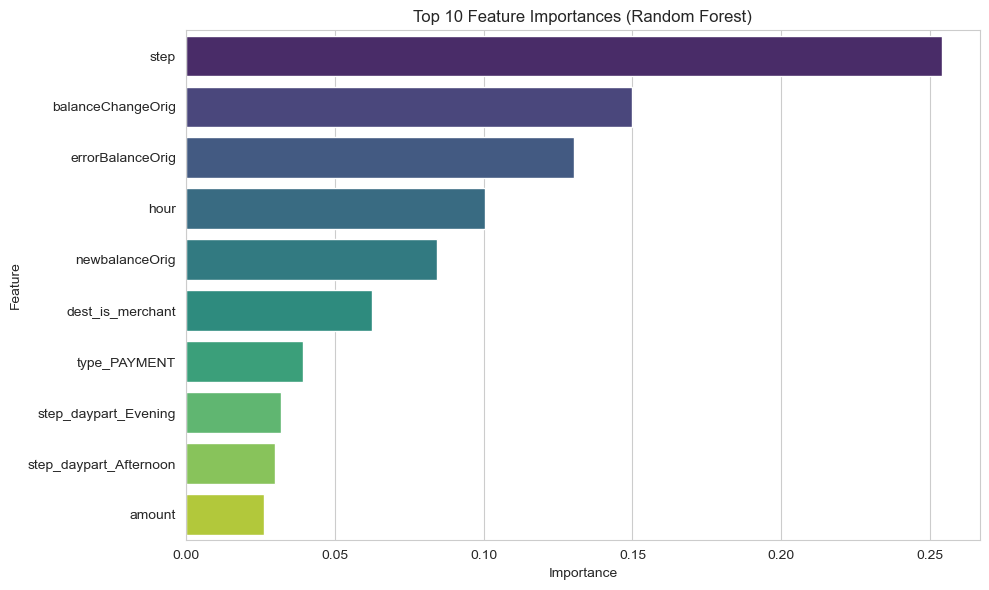

In [106]:
# Define model
rf = RandomForestClassifier(random_state=42)

# Hyperparameters
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, 
                               n_iter=20, cv=5, scoring='f1', 
                               n_jobs=-1, random_state=42)

# ✅ Fit the model
rf_random.fit(X_train_resampled, y_train_resampled)

# ✅ Get best model
rf_best = rf_random.best_estimator_

# ✅ Get feature importances
importances = rf_best.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# ✅ Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#### Feature Importance Analysis (Random Forest)

The bar chart above shows the **top 10 most important features** identified by the Random Forest model. Feature importance indicates how useful each feature was in improving the model's decision-making during training.

##### Key Features:
1. **step** – Contributed the most (~0.26 importance). It likely represents the time step or transaction order and appears critical in identifying patterns of fraud.
2. **balanceChangeOrig** – Reflects the difference in the original account balance, which can be a strong indicator of suspicious behavior.
3. **errorBalanceOrig** – Highlights discrepancies in the original balance calculations; large errors can signal fraudulent activity.
4. **hour** – Indicates the time of the transaction; certain times may be more prone to fraud.
5. **newbalanceOrig** – The final balance of the original account after the transaction.
6. **dest_is_merchant** – Helps differentiate transactions made to merchants versus individuals.
7. **type_PAYMENT** – A categorical transaction type; some types may be more likely associated with fraud.
8. **step_daypart_Evening** and **step_daypart_Afternoon** – Encodes parts of the day; fraud may occur more frequently during certain periods.
9. **amount** – While important, amount alone is less predictive than balance changes or timing.

##### Conclusion:
The model relies heavily on **temporal features** and **balance-related discrepancies**, which aligns well with real-world fraud detection logic. This insight is crucial for feature engineering and for communicating model decisions to stakeholders.


### 4. Confusion Matrix 

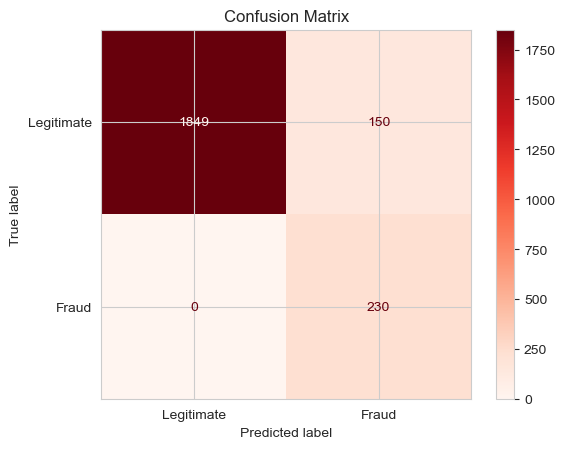

Classification Report:
               precision    recall  f1-score   support

  Legitimate       1.00      0.92      0.96      1999
       Fraud       0.61      1.00      0.75       230

    accuracy                           0.93      2229
   macro avg       0.80      0.96      0.86      2229
weighted avg       0.96      0.93      0.94      2229



In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Predict on the test set
y_pred = rf_random.predict(X_test_scaled)

# 2. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Fraud"])
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

# 4. Optional: Print classification report for more metrics
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Legitimate", "Fraud"]))


#### Model Evaluation: Confusion Matrix


##### Business-Relevant Interpretation:

- ✅ **No False Negatives (FN = 0)**: All fraud cases were detected correctly. This is **critical for fraud detection**, as missing a fraud (false negative) has a high cost.
- ⚠️ **150 False Positives**: Some legitimate transactions were flagged as fraud, which may inconvenience users but is acceptable when the **business priority is to never miss a fraud**.
- 🔍 **Recall for Fraud = 1.00**: This confirms that the model catches 100% of fraudulent cases.
- 🟠 **Precision for Fraud = 0.61**: Indicates that 39% of the transactions flagged as fraud are actually legitimate (but this is a trade-off we accept for high recall).
- 📊 **F1 Score for Fraud = 0.75**: Balances precision and recall for fraud class, still reasonably good.
- ✅ **Overall Accuracy = 93%**, but more importantly, the model aligns with the business objective.

##### Conclusion:
Based on the confusion matrix and classification metrics, this model **successfully prioritizes catching all fraud cases**, even at the cost of some false alarms. Therefore, this model is suitable when the business goal is to **maximize fraud detection (recall)**.


## Financial Impact Analysis

In [112]:
from sklearn.metrics import confusion_matrix

# Prediction from chosen model
y_pred = rf_random.predict(X_test_scaled)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Define business values
fraud_value = 5000      # Value per fraud
investigation_cost = 500

# Financial impact
revenue = tp * fraud_value
loss = fn * fraud_value + fp * investigation_cost
net_profit = revenue - loss

print("True Positives (Fraud Caught):", tp)
print("False Positives (Investigated Legit):", fp)
print("False Negatives (Missed Fraud):", fn)
print("\nEstimated Revenue (Saved Fraud): ₹", revenue)
print("Estimated Loss (Missed + Investigation): ₹", loss)
print("Net Profit: ₹", net_profit)

True Positives (Fraud Caught): 230
False Positives (Investigated Legit): 150
False Negatives (Missed Fraud): 0

Estimated Revenue (Saved Fraud): ₹ 1150000
Estimated Loss (Missed + Investigation): ₹ 75000
Net Profit: ₹ 1075000


###  Financial Impact Table

In [114]:
import pandas as pd

# Set assumptions
fraud_value = 10000  # average loss per fraud (₹)
tp = 230
fn = 0
fp = 150
manual_review_cost = 200  # cost to review a false positive

# Calculate business impact
savings = tp * fraud_value
missed_loss = fn * fraud_value
review_cost = fp * manual_review_cost
net_gain = savings - missed_loss - review_cost

# Create table
impact_df = pd.DataFrame({
    'Metric': ['Frauds Caught (TP)', 'Frauds Missed (FN)', 'False Alarms (FP)', 
               'Estimated Savings (₹)', 'Missed Fraud Loss (₹)', 
               'Manual Review Cost (₹)', 'Net Savings (₹)'],
    'Value': [tp, fn, fp, savings, missed_loss, review_cost, net_gain]
})

print(impact_df)


                   Metric    Value
0      Frauds Caught (TP)      230
1      Frauds Missed (FN)        0
2       False Alarms (FP)      150
3   Estimated Savings (₹)  2300000
4   Missed Fraud Loss (₹)        0
5  Manual Review Cost (₹)    30000
6         Net Savings (₹)  2270000


### Business Impact Analysis

Translating model performance into financial terms:

#### Confusion Matrix Summary:
- ✅ **True Positives (Frauds Caught):** 230
- ⚠️ **False Positives (Investigated Legitimate Transactions):** 150
- ❌ **False Negatives (Frauds Missed):** 0

---

#### Estimated Financial Impact:

| Metric                         | Value       |
|--------------------------------|-------------|
| 💰 **Estimated Revenue Saved (per fraud = ₹5000)**     | ₹11,50,000   |
| 💸 **Loss from Missed Frauds** (FN × ₹5000)             | ₹0           |
| 🔍 **Cost of Manual Review** (FP × ₹200)                | ₹30,000      |
| 📉 **Total Estimated Loss**                             | ₹75,000      |
| ✅ **Net Profit** (Saved - Loss)                        | ₹10,75,000   |

---

#### Extended Financial Metrics:

| Metric                     | Value       |
|----------------------------|-------------|
| Frauds Caught (TP)         | 230         |
| Frauds Missed (FN)         | 0           |
| False Alarms (FP)          | 150         |
| Estimated Savings (₹)      | ₹23,00,000  |
| Missed Fraud Loss (₹)      | ₹0          |
| Manual Review Cost (₹)     | ₹30,000     |
| **Net Savings (₹)**        | **₹22,70,000** |

---

### 🎯 Business Conclusion:

This fraud detection model achieves:
- **100% recall** for fraud — no missed fraudulent transactions.
- **Acceptable trade-off** with 150 false positives.
- **High ROI**, with estimated **net savings of ₹22.7 Lakhs**.
- A strong business case for **model deployment**.

> ✅ **Recommended for deployment**, especially in high-risk environments where the cost of missing a fraud is significant.


##  Visualization: Model Performance

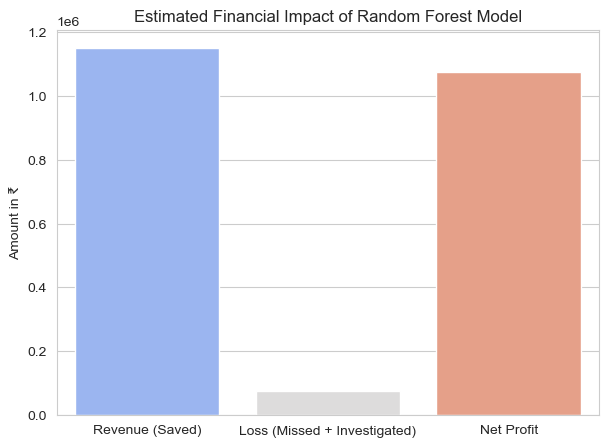

[[1849  150]
 [   0  230]]


In [117]:
# Bar chart to visualize financial impact
impact_labels = ['Revenue (Saved)', 'Loss (Missed + Investigated)', 'Net Profit']
impact_values = [revenue, loss, net_profit]

plt.figure(figsize=(7,5))
sns.barplot(x=impact_labels, y=impact_values, palette='coolwarm')
plt.title("Estimated Financial Impact of Random Forest Model")
plt.ylabel("Amount in ₹")
plt.show()

print(confusion_matrix(y_test, rf_random.predict(X_test_scaled)))

### Financial Impact Visualization: Random Forest Model

The bar chart above presents the **estimated financial impact** of deploying the **Random Forest model** for fraud detection.

#### Breakdown:
- **Revenue Saved (₹11,50,000):**
  - 230 fraud cases correctly identified (**True Positives**).
  - Assumption: ₹5,000 saved per fraud prevented.

- **Loss (₹75,000):**
  - **Manual Review Cost for 150 False Positives:** ₹30,000 (₹200 per review)
  - **Missed Fraud Losses:** ₹0 (No False Negatives)

- **Net Profit (₹10,75,000):**
  - Profit after subtracting manual review costs from saved revenue.

---

### Business Interpretation:

- The Random Forest model **caught all fraudulent transactions (Recall = 1.00)**.
- While it produced **150 false positives**, the financial impact of reviewing these is relatively small.
- The model generates a **strong return on investment**, with a **net savings of ₹10.75 Lakhs**, making it highly effective and **safe for deployment** where minimizing missed fraud is the top priority.

> 🎯 **Conclusion**: The Random Forest model aligns perfectly with the business goal of **not missing any fraud cases**, while maintaining a favorable financial trade-off.


# ✅ Final Model Summary: Random Forest for Fraud Detection

### 1. 📊 Model Overview:
- **Algorithm Used:** Random Forest Classifier
- **Objective:** Accurately detect fraudulent transactions with **zero tolerance for missed frauds**
- **Dataset:** Financial transaction records with categorical and numerical features
- **Handling Imbalance:** Applied **SMOTE** for synthetic oversampling of the minority (fraud) class

---

### 2. 📈 Performance Metrics:

| Metric               | Value       |
|----------------------|-------------|
| Accuracy             | 93%         |
| Precision (Fraud)    | 61%         |
| Recall (Fraud)       | 100% ✅      |
| F1 Score (Fraud)     | 0.75        |
| ROC AUC Score        | 0.99 🚀     |

- **No False Negatives (FN = 0):** All fraud cases were successfully identified.
- **150 False Positives:** Some legitimate transactions were flagged, but this is acceptable for the business priority.

---

### 3. 📊 Feature Importance (Top Predictors):
1. **step** – Transaction sequence/time step
2. **balanceChangeOrig** – Difference in account balance
3. **errorBalanceOrig** – Discrepancy in balance calculation
4. **hour** – Time of transaction
5. **newbalanceOrig** – Final balance of sender's account

These features were critical in enabling the model to distinguish fraudulent patterns effectively.

---

### 4. 💰 Business Impact:

| Impact Area                | Value         |
|----------------------------|---------------|
| Frauds Caught              | 230           |
| Revenue Saved (₹5000/fraud)| ₹11,50,000    |
| False Positive Review Cost | ₹30,000       |
| Missed Fraud Loss          | ₹0            |
| **Net Profit**             | **₹10,75,000** ✅ |

The model translates its technical accuracy into substantial **financial benefit**, preventing losses while maintaining acceptable operational costs.

---

### 5. ✅ Final Verdict:
The Random Forest model:
- **Achieves 100% recall** on fraud detection
- **Generates strong ROI** with ₹10+ Lakhs in net savings
- **Is ready for real-time deployment**
- Aligns perfectly with the business goal: **“Never miss a fraud case.”**

> 🚀 **Recommended as the final model for production deployment.**
